<a href="https://colab.research.google.com/github/kri-jac/world-food-waste-data/blob/main/world_food_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import matplotlib as plt

url = "https://raw.githubusercontent.com/kri-jac/world-food-waste-data/main/world-food-waste-data.csv"
df = pd.read_csv(url)
df.head(5)

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,loss_quantity,loss_qualitiative,loss_monetary,activity,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
0,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,NaN
1,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Reuter,FAO Sources,FAO Sources,NaN
2,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2009,5.22,5.219074683,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
3,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2008,5.43,5.426717684,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
4,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2007,5.61,5.614486626,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN


In [46]:
# check which columns do not contain significant ammounts of data to be used for the visualization
df.count()

geographicaream49              15156
country                        15156
region                           822
measureditemcpc                15156
crop                           15156
timepointyears                 15156
loss_per_clean                 15156
percentage_loss_of_quantity    14188
loss_quantity                   1262
loss_qualitiative                 77
loss_monetary                     69
activity                        9822
fsc_location1                  15008
periodofstorage                  115
treatment                          0
causeofloss                     1014
samplesize                      1143
units                              0
method_datacollection          12491
tag_datacollection             15156
reference                       6118
url                            10937
dtype: int64

In [47]:
# drop the columns which are not interesting for the visualization, either because it isnt relevant or because to little data is available
dfProcess = df.drop(['url', 'reference', 'tag_datacollection', 'method_datacollection', 'units', 'samplesize', 'causeofloss', 'treatment', 'periodofstorage', 'fsc_location1', 'measureditemcpc', 'region', 'loss_quantity', 'loss_qualitiative', 'loss_monetary'], axis = 1)
dfProcess.head(5)

,geographicaream49,country,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,activity
0,100,Bulgaria,Wheat,2000,1.80,1.79775798,NaN
1,100,Bulgaria,Wheat,2000,1.80,1.79775798,NaN
2,104,Myanmar,"Groundnuts, excluding shelled",2009,5.22,5.219074683,NaN
3,104,Myanmar,"Groundnuts, excluding shelled",2008,5.43,5.426717684,NaN
4,104,Myanmar,"Groundnuts, excluding shelled",2007,5.61,5.614486626,NaN


In [48]:
# shape of the dataframe
dfProcess.shape

(15156, 7)

In [49]:
# check the number of duplicate rows
df_duplicate_rows = dfProcess[df.duplicated()]
df_duplicate_rows.shape

(811, 7)

In [50]:
# drop duplicate rows of data
dfProcess = dfProcess.drop_duplicates()
dfProcess.head(5)

,geographicaream49,country,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,activity
0,100,Bulgaria,Wheat,2000,1.80,1.79775798,NaN
2,104,Myanmar,"Groundnuts, excluding shelled",2009,5.22,5.219074683,NaN
3,104,Myanmar,"Groundnuts, excluding shelled",2008,5.43,5.426717684,NaN
4,104,Myanmar,"Groundnuts, excluding shelled",2007,5.61,5.614486626,NaN
5,104,Myanmar,"Groundnuts, excluding shelled",2006,5.40,5.397460938,NaN


In [51]:
# count number of rows
dfProcess.count()

geographicaream49              13947
country                        13947
crop                           13947
timepointyears                 13947
loss_per_clean                 13947
percentage_loss_of_quantity    12983
activity                        9063
dtype: int64

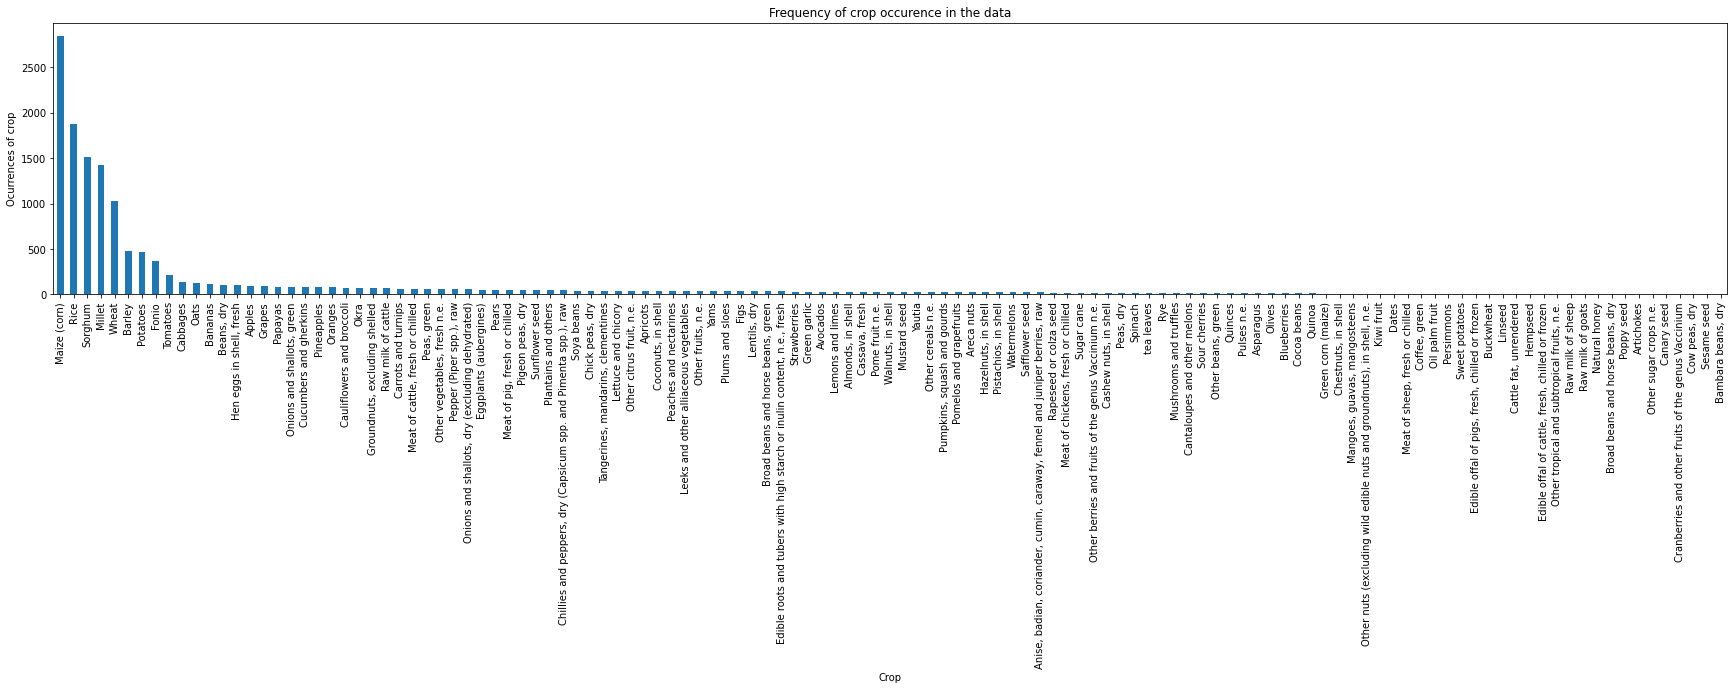

In [71]:
# plot a histogram for the ocurrence of crops
dfProcess.crop.value_counts().plot(kind='bar', figsize=(30,5))
plt.pyplot.title('Frequency of crop occurence in the data')
plt.pyplot.ylabel('Ocurrences of crop')
plt.pyplot.xlabel('Crop');

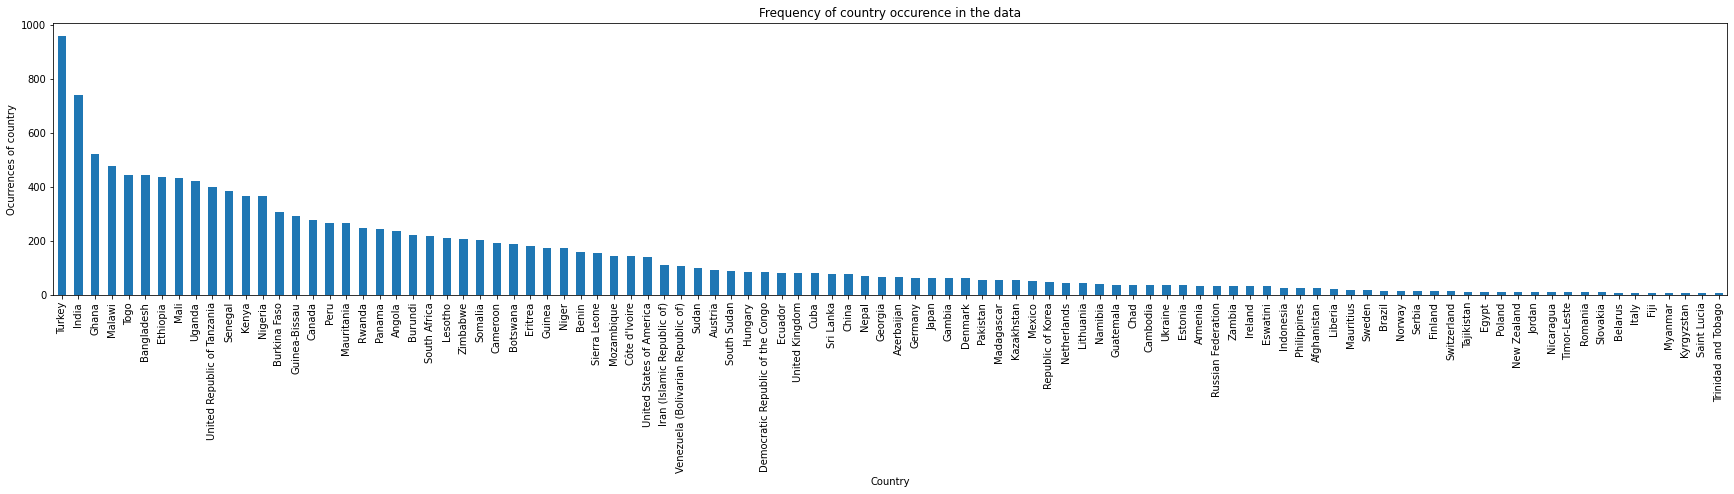

In [73]:
# plot a histogram for the ocurrence of countries
dfProcess.country.value_counts().nlargest(100).plot(kind='bar', figsize=(30,5))
plt.pyplot.title('Frequency of country occurence in the data')
plt.pyplot.ylabel('Ocurrences of country')
plt.pyplot.xlabel('Country');

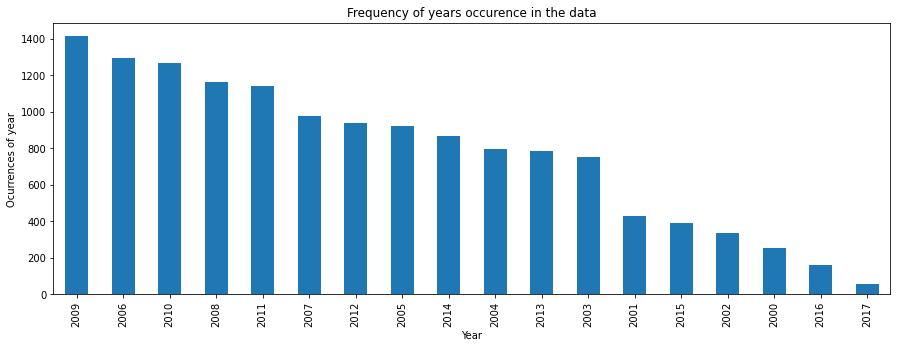

In [78]:
# plot a histogram for the ocurrence of years
dfProcess.timepointyears.value_counts().plot(kind='bar', figsize=(15,5))
plt.pyplot.title('Frequency of years occurence in the data')
plt.pyplot.ylabel('Ocurrences of year')
plt.pyplot.xlabel('Year');